### Operações em dados vetoriais

**Objetivo:** Este notebook vai explorar como processar dados geoespaciais utilizando a biblioteca GeoPandas. Vamos abordar a leitura e escrita de dados, operações espaciais, geometrias básicas e como filtrar e agregar dados espaciais.

Montagem do drive e criação do diretório de saída.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
from pathlib import Path

In [ ]:
if not os.path.exists('/content/drive/MyDrive/DADOS_GEOPYTHON/Aula03/SAIDA'):
  os.makedirs('/content/drive/MyDrive/DADOS_GEOPYTHON/Aula03/SAIDA')

Path('./').mkdir(parents=True, exist_ok=True)

Instalação das bibliotecas

In [ ]:
!pip install geopandas

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.ticker as mticker

Fonte dos dados: [Portal GEOSEADE](https://portalgeo.seade.gov.br/)

Acesso às camadas vetoriais

In [ ]:
estados = gpd.read_file('/content/drive/MyDrive/DADOS_GEOPYTHON/Aula03/DADOS/uf/UF BR 250.shp')
municipios = gpd.read_file('/content/drive/MyDrive/DADOS_GEOPYTHON/Aula03/DADOS/limite_municipal/LimiteMunicipal.shp')
bacias = gpd.read_file('/content/drive/MyDrive/DADOS_GEOPYTHON/Aula03/DADOS/ambiente_bacias_hidrograficas/BACIA_HIDRO_EST_SP.shp')
ucpi = gpd.read_file('/content/drive/MyDrive/DADOS_GEOPYTHON/Aula03/DADOS/ambiente_unid_conservacao_estadual_pi/uc_estadual_pi_2023.shp')
hospitais = gpd.read_file('/content/drive/MyDrive/DADOS_GEOPYTHON/Aula03/DADOS/saude_hospital/hospital.shp')
ferrovias = gpd.read_file('/content/drive/MyDrive/DADOS_GEOPYTHON/Aula03/DADOS/transporte_ferrovias/Ferrovias.shp')

Verificando o SRC das camadas

In [ ]:
print(estados.crs)
print(municipios.crs)
print(bacias.crs)
print(ucpi.crs)
print(hospitais.crs)
print(ferrovias.crs)

EPSG:4674
EPSG:4674
EPSG:4674
EPSG:4674
EPSG:4674
EPSG:4674


Verificando a geometria das camadas

In [ ]:
print(estados.geom_type.iloc[0])
print(municipios.geom_type.iloc[0])
print(bacias.geom_type.iloc[0])
print(ucpi.geom_type.iloc[0])
print(hospitais.geom_type.iloc[0])
print(ferrovias.geom_type.iloc[0])

MultiPolygon
Polygon
MultiPolygon
MultiPolygon
Point
LineString


In [ ]:
print(ferrovias.geom_type)

0      LineString
1      LineString
2      LineString
3      LineString
4      LineString
          ...    
445    LineString
446    LineString
447    LineString
448    LineString
449    LineString
Length: 450, dtype: object


Leitura dos dados

In [ ]:
estados.head()

,nome,sigla,geocodigo,geometry
0,Bahia,BA,29,"MULTIPOLYGON (((-38.71080 -17.96966, -38.70848..."
1,Pará,PA,15,"MULTIPOLYGON (((-46.45928 -0.90961, -46.45936 ..."
2,Rio de Janeiro,RJ,33,"MULTIPOLYGON (((-43.55929 -23.08050, -43.55938..."
3,São Paulo,SP,35,"MULTIPOLYGON (((-45.13777 -23.79018, -45.13777..."
4,Espírito Santo,ES,32,"MULTIPOLYGON (((-28.85365 -20.47547, -28.85372..."


In [ ]:
SP = estados[estados['sigla'] =='SP']

In [ ]:
print(municipios.shape)
municipios.head()

(645, 12)


,Cod_ibge,Municipio,GID_RA,GID_RG,RA,RG,Area_Km2,GID_RM,GID_AU,RM,AU,geometry
0,3509908,Cananéia,16,30,RA de Registro,RG de Registro,1237.357,NaN,NaN,None,None,"POLYGON ((-47.83033 -24.75638, -47.83013 -24.7..."
1,3520426,Ilha Comprida,16,30,RA de Registro,RG de Registro,196.567,NaN,NaN,None,None,"POLYGON ((-47.43660 -24.67434, -47.43638 -24.6..."
2,3505401,Barra do Turvo,16,30,RA de Registro,RG de Registro,1007.670,NaN,NaN,None,None,"POLYGON ((-48.44457 -24.65134, -48.44418 -24.6..."
3,3509254,Cajati,16,30,RA de Registro,RG de Registro,454.436,NaN,NaN,None,None,"POLYGON ((-48.15560 -24.64078, -48.15505 -24.6..."
4,3524600,Jacupiranga,16,30,RA de Registro,RG de Registro,704.189,NaN,NaN,None,None,"POLYGON ((-48.00104 -24.57160, -48.00040 -24.5..."


## Operações Espaciais

**1. Buffer**


A operação de buffer em geoprocessamento é uma ferramenta essencial utilizada para criar zonas de influência ao redor de elementos geoespaciais, como pontos, linhas ou polígonos. Basicamente, um buffer gera uma nova geometria que representa uma área com uma determinada distância ao redor da geometria original. Essa técnica é amplamente aplicada em análises espaciais, permitindo, por exemplo, a identificação de áreas de proteção ambiental ao redor de rios, a criação de zonas de segurança em torno de infraestruturas críticas, ou a delimitação de regiões de impacto em estudos ambientais. A operação de buffer pode ser ajustada para considerar diferentes tipos de distâncias e direções, oferecendo flexibilidade para diversas aplicações no planejamento e gestão territorial.

- **Qual a área de servidão administrativas das ferrovias no estado de São Paulo?**

❗
*Reprojeção da camada*

Para realizar operações de cálculo e de distância em dados geoespaciais, é fundamental reprojetar os dados para um sistema de coordenadas planas, também conhecido como projeção cartográfica. Isso ocorre porque sistemas de coordenadas geográficas, que utilizam latitude e longitude, medem distâncias em graus, o que não corresponde diretamente a distâncias lineares no espaço tridimensional. Em uma projeção plana, como a Projeção UTM ou a Projeção Albers Equal Area, as unidades de medida são metros ou quilômetros, permitindo cálculos precisos de áreas, distâncias e buffers. Sem essa reprojeção, os resultados das operações espaciais podem ser distorcidos, especialmente em áreas maiores, comprometendo a acurácia das análises espaciais.

In [ ]:
crs_albers = '+proj=aea +lat_0=-32 +lon_0=-60 +lat_1=-5 +lat_2=-42 +x_0=0 +y_0=0 +ellps=aust_SA +units=m +no_defs +type=crs'

In [ ]:
#Reprojeção da camada de ferrovias
ferrovias_albers = ferrovias.to_crs(crs_albers)
print(ferrovias_albers.crs)

+proj=aea +lat_0=-32 +lon_0=-60 +lat_1=-5 +lat_2=-42 +x_0=0 +y_0=0 +ellps=aust_SA +units=m +no_defs +type=crs


In [ ]:
#Reprojeção da camada do estado de SP para a plotagem
SP_albers = SP.to_crs(crs_albers)
print(SP_albers.crs)

+proj=aea +lat_0=-32 +lon_0=-60 +lat_1=-5 +lat_2=-42 +x_0=0 +y_0=0 +ellps=aust_SA +units=m +no_defs +type=crs


In [ ]:
# Cria um buffer de 30 metros ao redor da ferrovia
ferrovias_buffer = ferrovias_albers.buffer(30)

#Verifica o tipo da variável
type(ferrovias_buffer)

geopandas.geoseries.GeoSeries

In [ ]:
# Cria um GeoDataFrame para o buffer
ferrovias_buffer_gdf = gpd.GeoDataFrame(geometry=ferrovias_buffer, crs=ferrovias_albers.crs)

#Verifica o tipo da variável
type(ferrovias_buffer_gdf)

geopandas.geodataframe.GeoDataFrame

<Axes: >

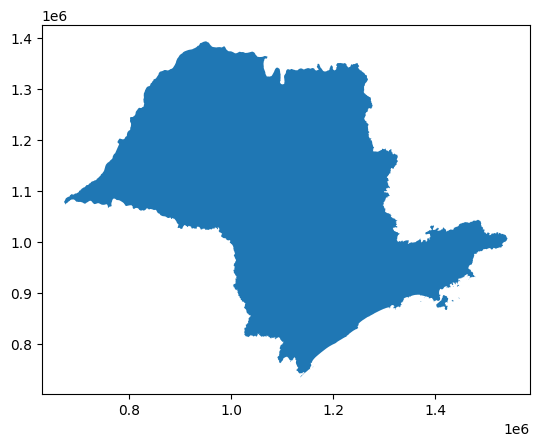

In [ ]:
SP_albers.plot()

❓Qual a geometria do resultado do buffer?

<ipython-input-18-9c336e64bd38>:12: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


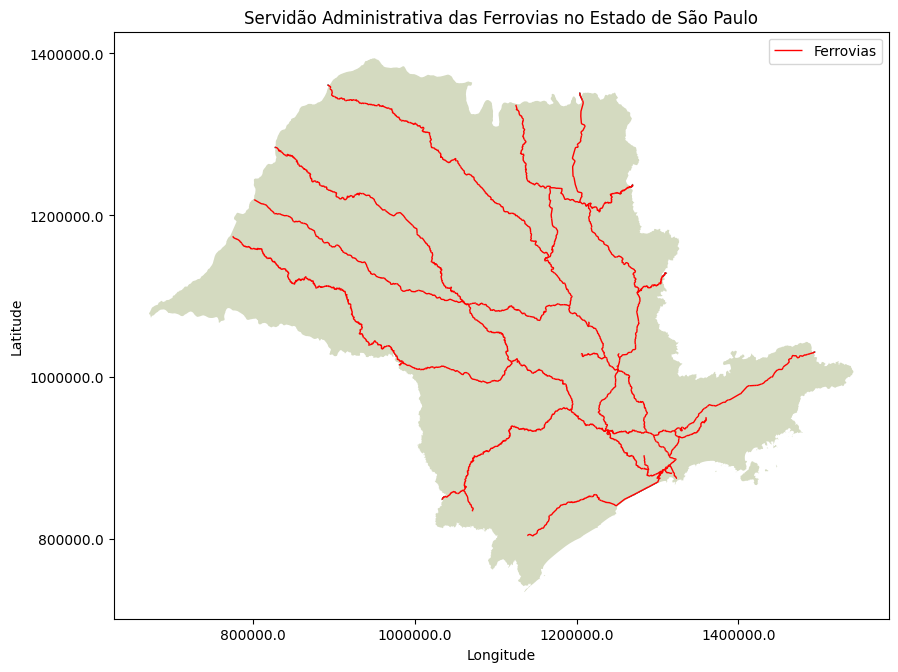

In [ ]:
# Plota o mapa com as três camadas: ferrovias, zona de servidão e estado de São Paulo
fig, ax = plt.subplots(figsize=(10, 10))

ferrovias_albers.plot(ax=ax, color='red', linewidth=1, label='Ferrovias')
ferrovias_buffer_gdf.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.5, label='Buffer de 30 metros')
SP_albers.plot(ax=ax, color='#D4DAC0', linewidth=1, label='Estado de São Paulo')

# Configurações adicionais do mapa
ax.set_title('Servidão Administrativa das Ferrovias no Estado de São Paulo')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()

# Formatação dos rótulos dos eixos para evitar notação científica
ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))

# Define o número de dígitos decimais desejados
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))

# Configura o intervalo entre os rótulos de longitude e latitude
ax.xaxis.set_major_locator(mticker.MultipleLocator(200000))  # Intervalo de 200 km
ax.yaxis.set_major_locator(mticker.MultipleLocator(200000))  # Intervalo de 200 km

# Exibe o mapa
plt.show()

✏ Faça o buffer do estado de São Paulo considerando as distâncias de 5km e 10 km. Plote as três camadas no mesmo mapa.

**2. Interseção**

O processamento de interseção permite identificar e analisar áreas comuns entre diferentes camadas de dados espaciais. Essa operação é frequentemente utilizada para determinar quais geometrias de uma camada intersectam com outra, como polígonos que cruzam uma linha ou áreas que sobrepõem um polígono. O resultado do processamento de interseção pode revelar informações importantes sobre a sobreposição espacial, como zonas de conflito, áreas de interesse compartilhado, ou regiões que precisam de análise mais detalhada. Em vez de recortar as geometrias, a interseção geralmente mantém as entidades completas, permitindo uma análise abrangente das relações espaciais entre os conjuntos de dados. Essa abordagem é essencial em diversos contextos, desde a gestão ambiental e planejamento urbano até a análise de redes de infraestrutura e estudos de impacto.

- **Quais municípios paulistas são servidos por ferrovias?**

In [ ]:
# Seleciona os polígonos que fazem interseção com a camada de linhas
municipioscomferrovias = municipios.loc[municipios.intersects(ferrovias.unary_union)]

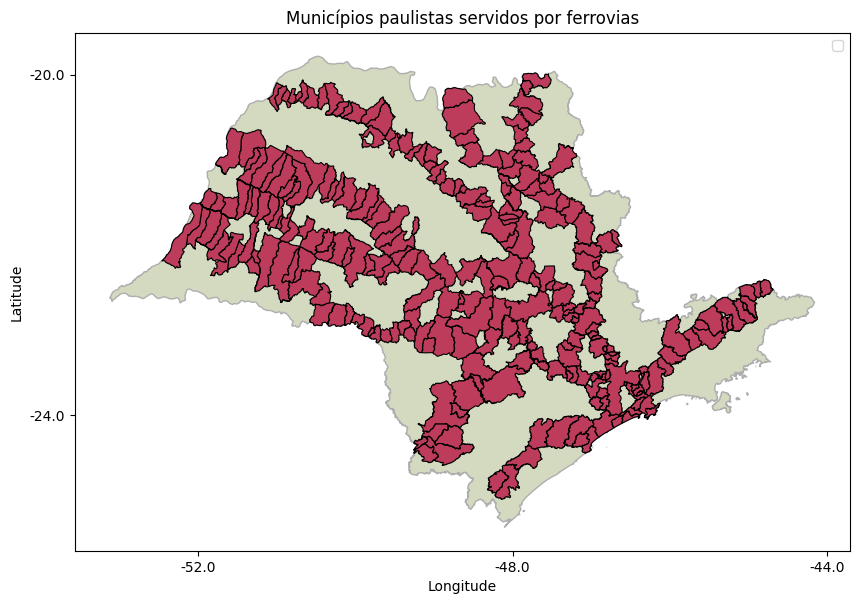

In [ ]:
# Plota o mapa com as duas camadas: municípios com ferrovias e estado de São Paulo
fig, ax = plt.subplots(figsize=(10, 10))


SP.plot(ax=ax, color='#D4DAC0', linewidth=1, edgecolor='#AEAEAE')
municipioscomferrovias.plot(ax=ax, color='#BE3C5B', linewidth=0.8, edgecolor='black')


# Configurações adicionais do mapa
ax.set_title('Municípios paulistas servidos por ferrovias')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()

# Formatação dos rótulos dos eixos para evitar notação científica
ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))

# Define o número de dígitos decimais desejados
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))

# Configura o intervalo entre os rótulos de longitude e latitude
ax.xaxis.set_major_locator(mticker.MultipleLocator(4))  # Intervalo de 4 graus
ax.yaxis.set_major_locator(mticker.MultipleLocator(4))  # Intervalo de 4 graus

# Exibe o mapa
plt.show()

**3. Recorte**

A função de recorte, ou "clip" em geoprocessamento, é uma operação que extrai uma parte específica de uma camada geoespacial com base em uma geometria de recorte, como um polígono de interesse. Ao aplicar o recorte, apenas as geometrias que intersectam com a área definida pelo polígono de recorte são mantidas, enquanto o restante é descartado. Essa função é útil para focar análises em áreas específicas, eliminar dados irrelevantes e simplificar visualizações ao remover partes de dados fora da região de interesse.

In [ ]:
municipios.head()

,Cod_ibge,Municipio,GID_RA,GID_RG,RA,RG,Area_Km2,GID_RM,GID_AU,RM,AU,geometry
0,3509908,Cananéia,16,30,RA de Registro,RG de Registro,1237.357,NaN,NaN,None,None,"POLYGON ((-47.83033 -24.75638, -47.83013 -24.7..."
1,3520426,Ilha Comprida,16,30,RA de Registro,RG de Registro,196.567,NaN,NaN,None,None,"POLYGON ((-47.43660 -24.67434, -47.43638 -24.6..."
2,3505401,Barra do Turvo,16,30,RA de Registro,RG de Registro,1007.670,NaN,NaN,None,None,"POLYGON ((-48.44457 -24.65134, -48.44418 -24.6..."
3,3509254,Cajati,16,30,RA de Registro,RG de Registro,454.436,NaN,NaN,None,None,"POLYGON ((-48.15560 -24.64078, -48.15505 -24.6..."
4,3524600,Jacupiranga,16,30,RA de Registro,RG de Registro,704.189,NaN,NaN,None,None,"POLYGON ((-48.00104 -24.57160, -48.00040 -24.5..."


**- Quais bacias estão localizadas no município de São Manuel?**

In [ ]:
#Seleção do município:
nome_mun = 'São Manuel'

muni = municipios[municipios['Municipio'] == nome_mun]
muni

,Cod_ibge,Municipio,GID_RA,GID_RG,RA,RG,Area_Km2,GID_RM,GID_AU,RM,AU,geometry
234,3550100,São Manuel,13,9,RA de Sorocaba,RG de Botucatu,650.734,NaN,NaN,None,None,"POLYGON ((-48.64543 -22.53641, -48.64491 -22.5..."


↪ Se usar o nome do município, verifique se a grafia está correta.
↪ Se usar o código do município, verifique a quantidade de dígitos e o tipo da coluna.

In [ ]:
# Recorta o polígono principal usando o polígono máscara
# Isso assume que há apenas uma geometria na camada de máscara
recorte = bacias.geometry.apply(lambda geom: geom.intersection(muni.geometry.unary_union))

# Cria um novo GeoDataFrame para armazenar o resultado do recorte
bacias_muni = gpd.GeoDataFrame(geometry=recorte, crs=bacias.crs)

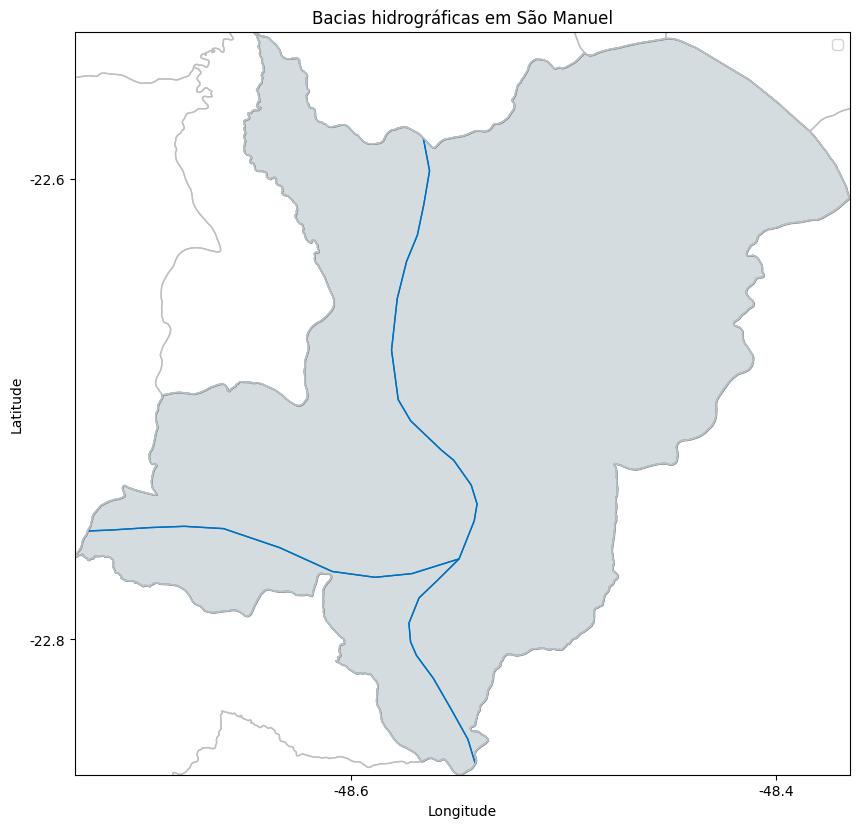

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))


muni.plot(ax=ax, linewidth=1, color='#D5DCDF', edgecolor='#7F7F7F')
bacias_muni.plot(ax=ax, color='none', linewidth=1, edgecolor='#0070C0')
municipios.plot(ax=ax, color='none', linewidth=1, edgecolor='#BFBFBF')

# Configurações adicionais do mapa
ax.set_title('Bacias hidrográficas em São Manuel')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()

# Formatação dos rótulos dos eixos para evitar notação científica
ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))

# Define o número de dígitos decimais desejados
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))

# Configura o intervalo entre os rótulos de longitude e latitude
ax.xaxis.set_major_locator(mticker.MultipleLocator(0.2))  # Intervalo de 0.2 grau
ax.yaxis.set_major_locator(mticker.MultipleLocator(0.2))  # Intervalo de 0.2 grau



# Obtem a extensão do polígono de interesse
bbox = muni.total_bounds  # [xmin, ymin, xmax, ymax]
# Define os limites dos eixos para o zoom na camada de interesse
ax.set_xlim(bbox[0], bbox[2])
ax.set_ylim(bbox[1], bbox[3])



# Exibe o mapa
plt.show()

✏ Selecione os hospitais localizados no município de Sorocaba.

**4. Diferença**

A operação de diferença no geoprocessamento é utilizada para subtrair uma geometria de outra, resultando em uma nova geometria que representa a área remanescente após a remoção da geometria subtraída. É útil para analisar e visualizar áreas que são exclusivas de uma camada em relação a outra, como identificar zonas que permanecem em um polígono após a remoção de uma área de sobreposição.

In [ ]:
# Realiza a operação de diferença
# Isso assume que a camada 'ucpi' é a geometria que será subtraída da camada 'SP'
diferenca = SP.geometry.apply(lambda geom: geom.difference(ucpi.geometry.unary_union))

# Cria um novo GeoDataFrame para armazenar o resultado da diferença
nao_ucpi = gpd.GeoDataFrame(geometry=diferenca, crs=SP.crs)

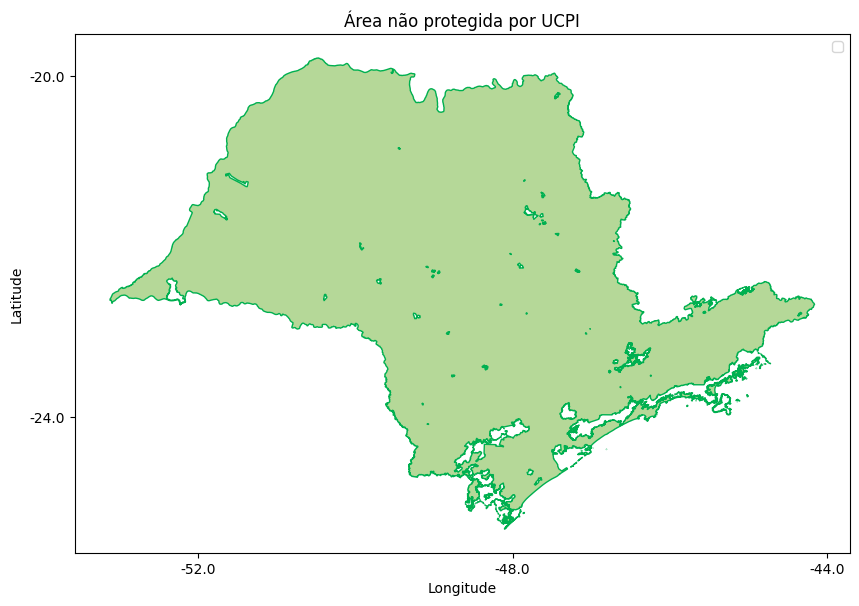

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))


nao_ucpi.plot(ax=ax, color='#B5D898', linewidth=1, edgecolor='#00B050')

# Configurações adicionais do mapa
ax.set_title('Área não protegida por UCPI')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()

# Formatação dos rótulos dos eixos para evitar notação científica
ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))

# Define o número de dígitos decimais desejados
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))

# Configura o intervalo entre os rótulos de longitude e latitude
ax.xaxis.set_major_locator(mticker.MultipleLocator(4))  # Intervalo de 4 graus
ax.yaxis.set_major_locator(mticker.MultipleLocator(4))  # Intervalo de 4 graus

# Exibe o mapa
plt.show()

**5. Junção espacial (*spatial join*)**

A operação de *spatial join* combina informações de dois conjuntos de dados geoespaciais com base em sua localização espacial. Em vez de associar dados apenas com base em atributos ou chaves primárias, o *spatial join* relaciona entidades geográficas com base em como elas se sobrepõem ou estão localizadas uma em relação à outra. Por exemplo, ao realizar um *spatial join* entre pontos e polígonos, como hospitais e municípios, você pode atribuir informações dos pontos (hospitais) aos polígonos (municípios) onde esses pontos estão localizados. Isso facilita a análise espacial, como contar o número de hospitais em cada município, identificar áreas de sobreposição e entender padrões espaciais.

Leia mais sobre *spatial joins* [aqui](https://geopandas.org/en/stable/gallery/spatial_joins.html).

In [ ]:
# Conta o número de hospitais em cada município
# Realiza a operação de 'spatial join' para associar hospitais a municípios
hospitais_em_municipios = gpd.sjoin(hospitais, municipios, how='inner', op='within')

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [ ]:
print(hospitais.columns)
print(municipios.columns)
print(hospitais_em_municipios.columns)

Index(['co_cnes', 'Lat', 'Long', 'f_coord', 'co_municip', 'municipio',
       'TipoSeade', 'co_tp_unid', 'tp_unidade', 'co_sub_tip', 'sub_tipo',
       'co_naturez', 'natureza_j', 'natureza_1', 'no_razao_s', 'no_fantasi',
       'no_logrado', 'nu_enderec', 'no_complem', 'no_bairro', 'co_cep',
       'geometry'],
      dtype='object')
Index(['Cod_ibge', 'Municipio', 'GID_RA', 'GID_RG', 'RA', 'RG', 'Area_Km2',
       'GID_RM', 'GID_AU', 'RM', 'AU', 'geometry'],
      dtype='object')
Index(['co_cnes', 'Lat', 'Long', 'f_coord', 'co_municip', 'municipio',
       'TipoSeade', 'co_tp_unid', 'tp_unidade', 'co_sub_tip', 'sub_tipo',
       'co_naturez', 'natureza_j', 'natureza_1', 'no_razao_s', 'no_fantasi',
       'no_logrado', 'nu_enderec', 'no_complem', 'no_bairro', 'co_cep',
       'geometry', 'index_right', 'Cod_ibge', 'Municipio', 'GID_RA', 'GID_RG',
       'RA', 'RG', 'Area_Km2', 'GID_RM', 'GID_AU', 'RM', 'AU'],
      dtype='object')


In [ ]:
# Conta o número de hospitais por município
contagem_hospitais = hospitais_em_municipios.groupby('index_right').size()
contagem_hospitais

,0
index_right,
5,1
9,3
14,1
17,1
18,1
...,...
637,1
639,1
641,1


In [ ]:
# Adiciona a contagem ao GeoDataFrame dos municípios
municipios['num_hospitais'] = municipios.index.map(contagem_hospitais).fillna(0).astype(int)

In [ ]:
municipios.head()

,Cod_ibge,Municipio,GID_RA,GID_RG,RA,RG,Area_Km2,GID_RM,GID_AU,RM,AU,geometry,num_hospitais
0,3509908,Cananéia,16,30,RA de Registro,RG de Registro,1237.357,NaN,NaN,None,None,"POLYGON ((-47.83033 -24.75638, -47.83013 -24.7...",0
1,3520426,Ilha Comprida,16,30,RA de Registro,RG de Registro,196.567,NaN,NaN,None,None,"POLYGON ((-47.43660 -24.67434, -47.43638 -24.6...",0
2,3505401,Barra do Turvo,16,30,RA de Registro,RG de Registro,1007.670,NaN,NaN,None,None,"POLYGON ((-48.44457 -24.65134, -48.44418 -24.6...",0
3,3509254,Cajati,16,30,RA de Registro,RG de Registro,454.436,NaN,NaN,None,None,"POLYGON ((-48.15560 -24.64078, -48.15505 -24.6...",0
4,3524600,Jacupiranga,16,30,RA de Registro,RG de Registro,704.189,NaN,NaN,None,None,"POLYGON ((-48.00104 -24.57160, -48.00040 -24.5...",0


O módulo **mcolors** é uma parte da biblioteca Matplotlib que fornece utilitários para trabalhar com cores e mapas de cores, incluindo funções e classes para criar, manipular e aplicar cores e escalas de cores em visualizações.

In [ ]:
import matplotlib.colors as mcolors

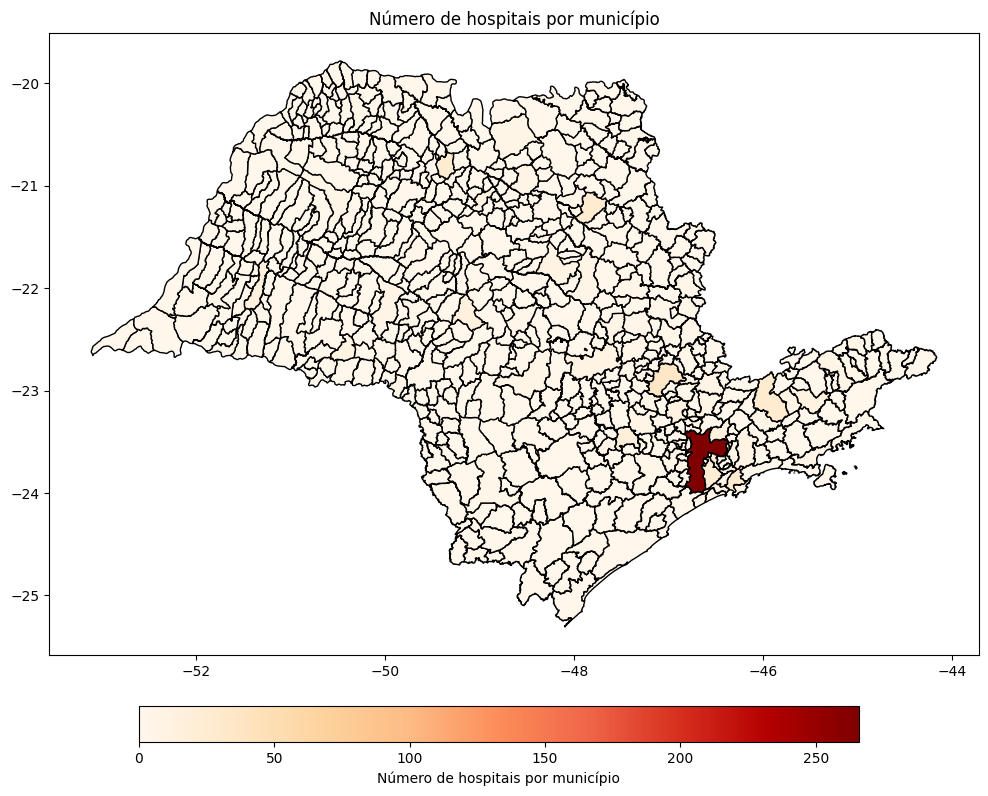

In [ ]:
# Cria o plot
fig, ax = plt.subplots(figsize=(12, 12))

# Plota o GeoDataFrame
cmap = 'OrRd'  # Mapa de cores
norm = mcolors.Normalize(vmin=municipios['num_hospitais'].min(), vmax=municipios['num_hospitais'].max())

# Plota os municípios
municipios.plot(column='num_hospitais', ax=ax, cmap=cmap, norm=norm, edgecolor='black')

# Adiciona a barra de cores horizontal
cbar = plt.colorbar(ax.collections[0], ax=ax, orientation='horizontal', pad=0.1, shrink=0.8)
cbar.set_label('Número de hospitais por município')

# Ajusta a posição da barra de cores horizontal
cbar.ax.set_position([0.1, 0.23, 0.8, 0.03])  # [x, y, width, height] em frações da figura

# Adiciona título
ax.set_title('Número de hospitais por município')

# Exibe o gráfico
plt.show()

**Filtragem e agregação de dados**

In [ ]:
municipios.head(2)

,Cod_ibge,Municipio,GID_RA,GID_RG,RA,RG,Area_Km2,GID_RM,GID_AU,RM,AU,geometry,num_hospitais
0,3509908,Cananéia,16,30,RA de Registro,RG de Registro,1237.357,NaN,NaN,None,None,"POLYGON ((-47.83033 -24.75638, -47.83013 -24.7...",0
1,3520426,Ilha Comprida,16,30,RA de Registro,RG de Registro,196.567,NaN,NaN,None,None,"POLYGON ((-47.43660 -24.67434, -47.43638 -24.6...",0


In [ ]:
#Removendo o município de São Paulo

muni_sem_sp = municipios[municipios['Municipio'] != 'São Paulo']

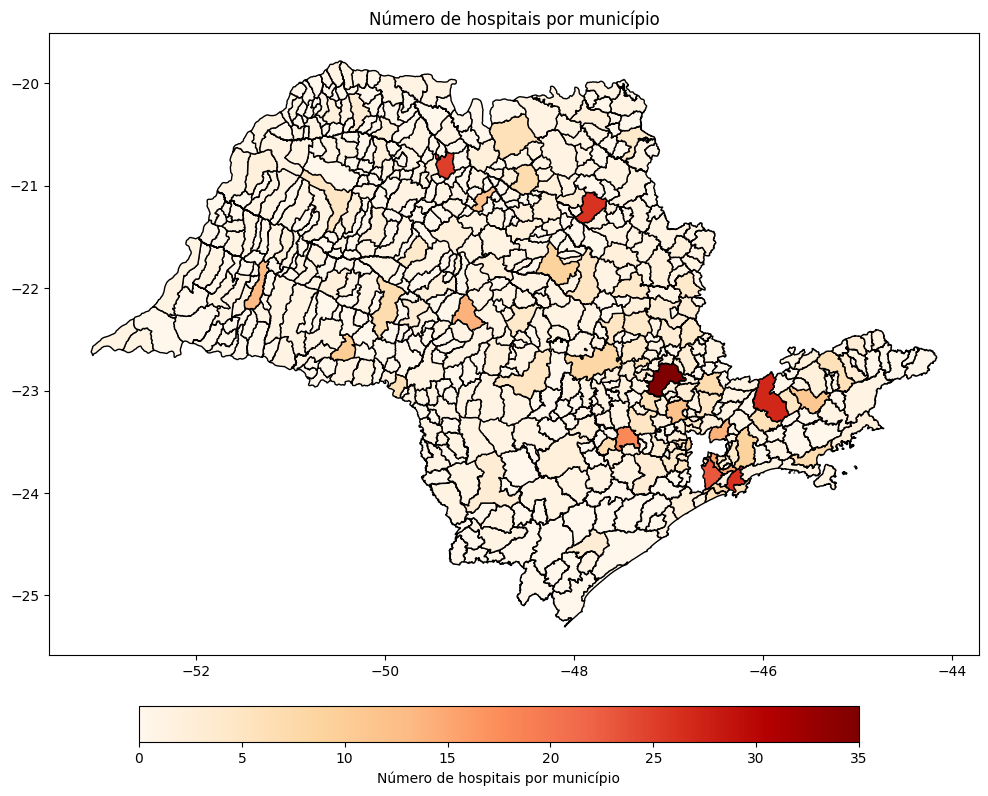

In [ ]:
# Cria o plot
fig, ax = plt.subplots(figsize=(12, 12))

# Plota o GeoDataFrame
cmap = 'OrRd'  # Mapa de cores
norm = mcolors.Normalize(vmin=muni_sem_sp['num_hospitais'].min(), vmax=muni_sem_sp['num_hospitais'].max())

# Plota os municípios
muni_sem_sp.plot(column='num_hospitais', ax=ax, cmap=cmap, norm=norm, edgecolor='black')

# Adiciona a barra de cores horizontal
cbar = plt.colorbar(ax.collections[0], ax=ax, orientation='horizontal', pad=0.1, shrink=0.8)
cbar.set_label('Número de hospitais por município')

# Ajusta a posição da barra de cores horizontal
cbar.ax.set_position([0.1, 0.23, 0.8, 0.03])  # [x, y, width, height] em frações da figura

# Adiciona título
ax.set_title('Número de hospitais por município')

# Exibe o gráfico
plt.show()

In [ ]:
# Ordena o GeoDataFrame pela coluna 'num_hospitais' em ordem decrescente
municipios_sorted = municipios.sort_values(by='num_hospitais', ascending=False)
municipios_sorted.head()

,Cod_ibge,Municipio,GID_RA,GID_RG,RA,RG,Area_Km2,GID_RM,GID_AU,RM,AU,geometry,num_hospitais
92,3550308,São Paulo,10,40,Região Metropolitana de São Paulo,RG de São Paulo,1521.110,1.0,NaN,RM de São Paulo,None,"POLYGON ((-46.55066 -23.35714, -46.55011 -23.3...",266
198,3509502,Campinas,4,11,RA de Campinas,RG de Campinas,794.571,2.0,NaN,RM de Campinas,None,"POLYGON ((-46.95706 -22.72943, -46.95631 -22.7...",35
183,3549904,São José dos Campos,15,38,RA de São José dos Campos,RG de São José dos Campos,1099.409,4.0,NaN,RM do Vale do Paraíba e Litoral Norte,None,"POLYGON ((-45.91146 -22.81627, -45.91077 -22.8...",27
41,3548500,Santos,12,33,RA de Santos,RG de Santos,281.033,3.0,NaN,RM da Baixada Santista,None,"POLYGON ((-46.23804 -23.73525, -46.23778 -23.7...",26
486,3543402,Ribeirão Preto,11,31,RA de Ribeirão Preto,RG de Ribeirão Preto,650.916,6.0,NaN,RM de Ribeirão Preto,None,"POLYGON ((-47.79411 -21.05967, -47.79261 -21.0...",26


In [ ]:
# Obtém os 10 municípios com o maior número de hospitais
top_10_municipios = municipios.nlargest(10, 'num_hospitais')

# Exibe o resultado
print(top_10_municipios[['Municipio', 'num_hospitais']])

                 Municipio  num_hospitais
92               São Paulo            266
198               Campinas             35
183    São José dos Campos             27
41                  Santos             26
486         Ribeirão Preto             26
546  São José do Rio Preto             25
50   São Bernardo do Campo             23
94                Sorocaba             18
55             Santo André             15
105              Guarulhos             14
